In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [2]:
data=pd.read_csv(r"C:\Users\AL-Renad\Documents\playing\mlproj\studing\data\Human_Resources_Employee_Attrition.csv")
data.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
data.work_accident.value_counts()

0    12830
1     2169
Name: work_accident, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_of_projects     14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_at_company       14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.duplicated().sum()

3008

In [3]:
data=data.drop_duplicates()

In [11]:
data.shape

(11991, 10)

In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

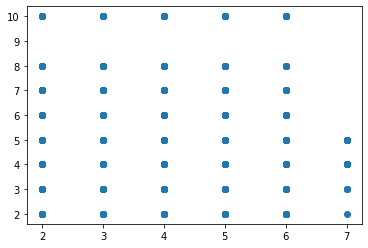

In [14]:
plt.scatter(data['number_of_projects'],data['years_at_company'])


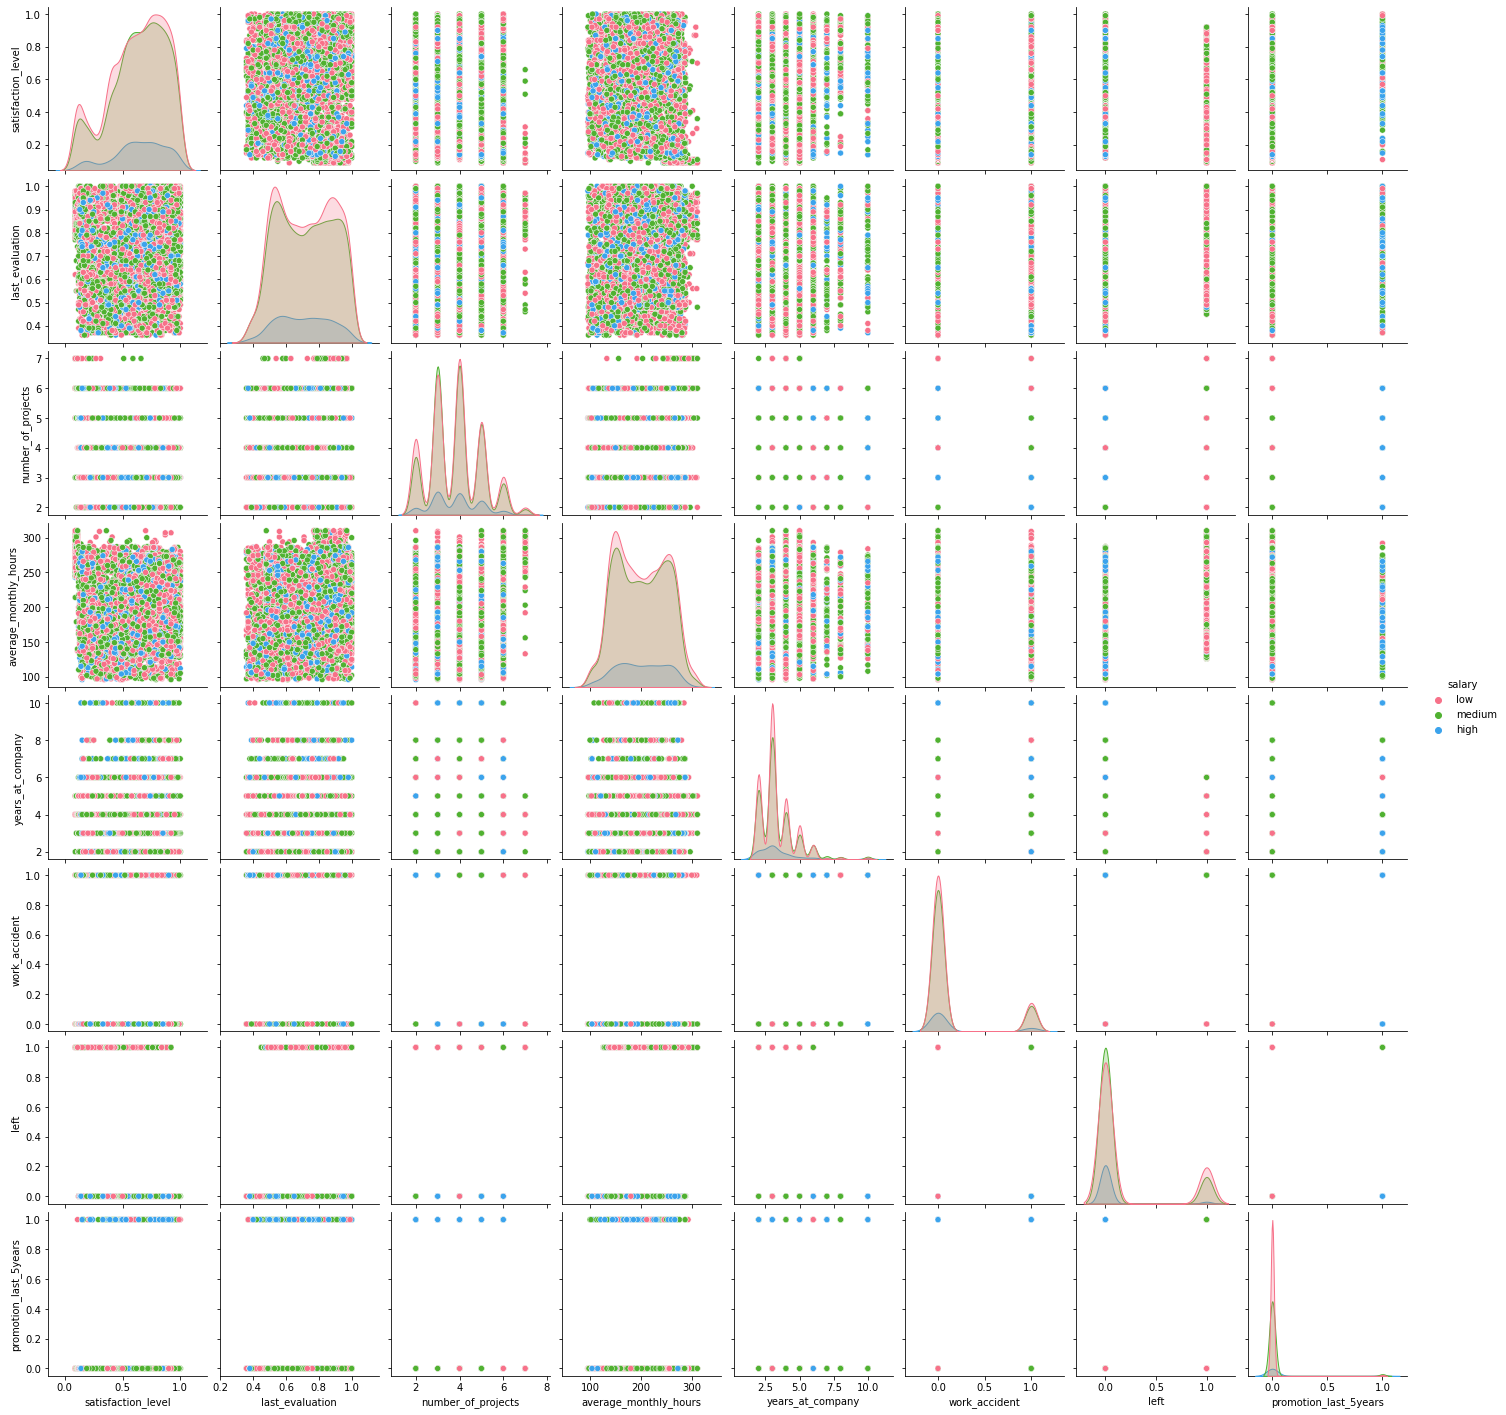

In [15]:
import seaborn as sns
sns.pairplot(pd.DataFrame(data,columns=data.columns),hue='salary',palette='husl')

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["department"]=le.fit_transform(data["department"])

In [8]:
data["salary"]=le.fit_transform(data["salary"])

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [10]:
X=data
X.shape

(11991, 10)

In [11]:
pcamodel=PCA()
X=pcamodel.fit_transform(X)

# Elbow Method for Optimal Clusters
This cell computes and visualizes the elbow method to determine the optimal number of clusters for KMeans.

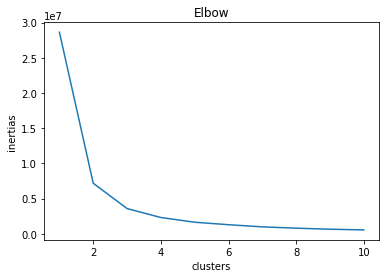

In [12]:


ilist = []
n = 11
for i in range(1, n):
    kmeans = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)

plt.plot(range(1, n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

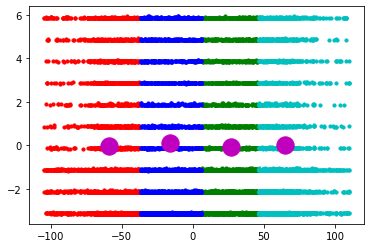

In [15]:
kmeans = KMeans(n_clusters=4,init="k-means++", random_state=42)
y_kmeans=kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=10,c='r')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=10,c="g")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=10,c="b")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=10,c='c')
# plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=10,c="y")
# plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=10,c="orange")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="m")

plt.show()
